In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.neighbors import KNeighborsClassifier # k-ближайших новых соседей
from sklearn.svm import SVC # SVM для классификации
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Дерево Решений
from sklearn.ensemble import RandomForestClassifier  # Random Forest


from sklearn.tree import plot_tree # отрисовка дерева

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV # подбор гиперпараметров с кроссвалидацией

import gc

sns.set()
%matplotlib inline

import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

/var/folders/mw/bkx9xzrs45g7jqfptt8zy8740000gn/T/ipykernel_790/2656280203.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Полезные ссылки
* [Линейные модели](https://scikit-learn.ru/1-1-linear-models/)
* [Метрики классификации](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/#classification-metrics)
* [Метрики в задачах машинного обучения](https://habr.com/ru/companies/ods/articles/328372/)
* [Презентация про метрики и несбалансированное обучение](https://ld86.github.io/ml-slides/unbalanced.html#/)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
* [Открытый курс машинного обучения. Тема 3. Классификация, деревья решений и метод ближайших соседей](https://habr.com/ru/companies/ods/articles/322534/)
* [Открытый курс машинного обучения. Тема 4. Линейные модели классификации и регрессии](https://habr.com/ru/companies/ods/articles/323890/#1-lineynaya-regressiya)
* [Умная нормализация данных: категориальные и порядковые данные, “парные” признаки](https://habr.com/ru/articles/527860/)
* [Умная нормализация данных](https://habr.com/ru/articles/527334/)
* [Категориальные признаки](https://habr.com/ru/articles/666234/)
* [Преобразования данных](https://scikit-learn.ru/category/dataset_transformations/)
* [Decision Tree](https://scikit-learn.ru/1-10-decision-trees/)

# Загрузка и подготовка данных 

In [93]:
path = '/Users/amirmukhamedzhan/Yandex.Disk.localized/Документы/KFU/ML/ML_FALL_2023/data/Social_Network_Ads.csv'

dataset = pd.read_csv(path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [95]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [96]:
X.shape, y.shape

((400, 2), (400,))

In [97]:
# разбиение данных на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [99]:
# Масштабирование данных
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
X_train[:10]

array([[ 0.582, -0.887],
       [-0.607,  1.462],
       [-0.013, -0.568],
       [-0.607,  1.897],
       [ 1.374, -1.409],
       [ 1.473,  0.998],
       [ 0.086, -0.8  ],
       [-0.013, -0.249],
       [-0.211, -0.568],
       [-0.211, -0.191]])

In [101]:
X_test[:10]

array([[-0.805,  0.505],
       [-0.013, -0.568],
       [-0.31 ,  0.157],
       [-0.805,  0.273],
       [-0.31 , -0.568],
       [-1.102, -1.438],
       [-0.706, -1.583],
       [-0.211,  2.158],
       [-1.993, -0.046],
       [ 0.879, -0.771]])

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение. Задача классификации</a></li>
<li><a href='#env'>Линейный классификатор</a></li>
<li><a href='#binary'>Бинарная классификация</a></li>
<li><a href='#logreg'>Логистическая регрессия</a></li>
<li><a href='#knn'>K-Nearest Neighbors (K-NN)</a></li>
<li><a href='#svm'>SVM</a></li>
<li><a href='#kSVM'>Kernel SVM</a></li>
<li><a href='#naivebayes'>Naive Bayes</a></li>
<li><a href='#dt'>Decision Tree</a></li>
<li><a href='#rf'>Random Forest</a></li>
<li><a href='#dz1'>ДЗ №1</a></li>
<li><a href='#dz2'>ДЗ №2</a></li>
</ol>

# Введение. Задача классификации <a name='intro'></a><a name='intro'></a>

В задачах классификации требуется для заданных элементов определить отношение к одному из классов. Например, необходимо классифицировать клиентов в банке на основе персональных данных (надежный или ненадежный), пациентов на основе результатов анализов (входит ли в группу риска), сообщения электронной почты (является ли спамом) и т.п.

В том случае, если классов два, задача называется "бинарная классификация".

Модели, осуществляющие классификацию, называются классификаторами. Самым простым примером классификатора является линейный классификатор.

<a href='#toc'>Назад к Оглавлению</a>

# Линейный классификатор <a name='env'></a><a name='env'></a>

Если задан вектор признаков $\vec{x}=(x_1, \cdots, x_n)$ и вектор весов $\vec{w}=(w_0, w_1, \cdots, w_n)$, то их линейной комбинацией является выражение


$$
y = w_0 + x_1 w_1 + \cdots + w_n x_n,
$$


или, при добавлении единицы в вектор признаков $\vec{x}=(1, x_1, \cdots, x_n)$ в более коротком виде
$$
y=w^T x.
$$

При рассмотрении задачи классификации целевым переменным $y$ назначают какое-то значение (например $1$ и $-1$ для бинарной классификации) и оценивают вероятность того, что выражение $y = w^Tx$ примет это значение. Тем самым в результате получается не только факт отнесения каждой выборки признаков к определенному классу, но и вероятность, с которой эта выборка относится к этому классу. Например, пациент может быть отнесен к зоне риска, но с небольшой вероятностью.

Проиллюстрируем механизм работы линейного классификатора на плоскости (т.е. для двух признаковых переменных). Зададим множество точек и искуственно назначим всем точкам признак цвета.

In [2]:
from sklearn.datasets import make_classification

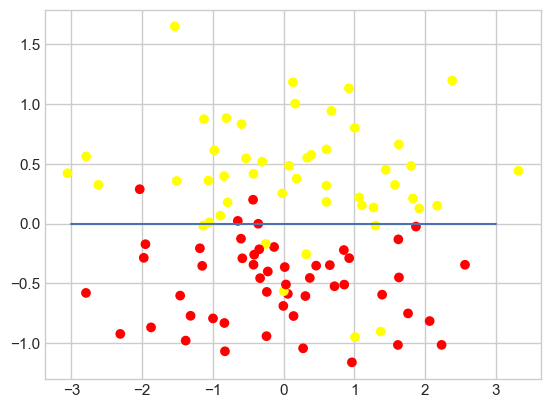

In [3]:
points, color = make_classification(n_samples=100, n_classes=2, class_sep=0.5, random_state=1)
plt.scatter(points[:,0], points[:,1], c=color, cmap='autumn')
plt.plot([-3, 3], [0, 0], c='b')
plt.grid(True)
plt.show()

Приблизительно множество желтых и красных точек мы можем разделить прямой $y=0$.

Пример иллюстрирует применение метода логистической регрессии для решения задачи классификации для объектов, обладающих двумя признаками. В общем случае (для произвольного количества признаков) метод логистической регрессии заключается в том, что признаковое пространство может быть разделено на две области гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. Гиперплоскость это пространство с размерностью на единицу меньшее, чем разделяемое пространство (например: точка делит прямую на две части, прямая делить плоскость, плоскость делит пространство).

Если такое линейное разделение можно сделать без ошибок (т.е. все точки каждого класса находятся по "свою" сторону от разделяющей гиперплоскости), то выборка называется линейно разделимой.

Ниже пример линейно разделимой пространственной выборки.

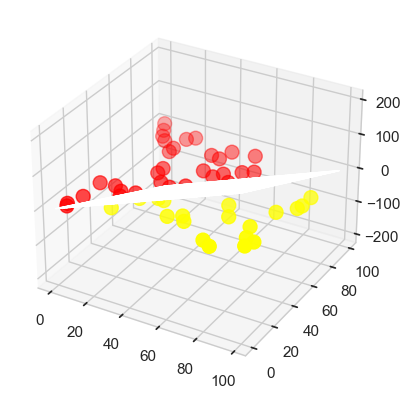

In [4]:
x = np.random.randint(1, 100, 50)
y = np.random.randint(1, 100, 50)
z = np.cos(x)
A, B, C = 2, -2, 0
color = np.array([1 if A*i+B*j+C*k>0 else 0 for i,j,k in zip(x,y,z)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, label='parametric curve', c=color, cmap='autumn', s=100)
u, v = np.meshgrid(range(100), range(100))
w = A*u+B*v
ax.plot_surface(u, v, w)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Бинарная классификация <a name='binary'></a><a name='binary'></a>

Рассмотрим подробнее задачу бинарной классификации. Принадлежность к первому классу обозначим "+1", принадлежность ко второму классу обозначим "-1". Для описания отношения объекта к тому или другому классу удобно использовать функцию "сигнум" $y=\text{sign}(x)$.

$$
\text{sign}(x) = 
\left\{
    \begin{array}{l}
        -1, x<0, \\ 0, x=0, \\ 1, x>0.
    \end{array}
\right.
$$

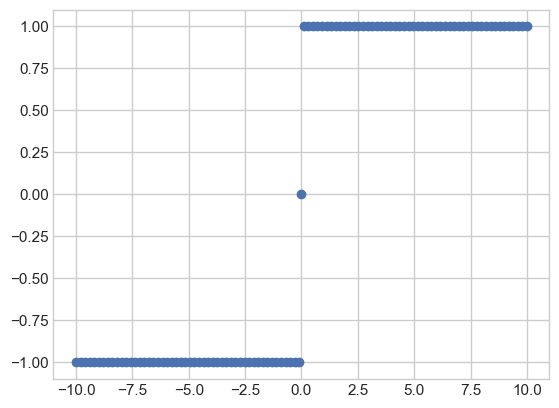

In [5]:
def signum(x):
    if x < 0:
        return -1
    elif x == 0:
        print("here")
        return 0
    else:
        return 1
xs = np.linspace(-10,10,100)
plt.grid(True)
plt.scatter(np.r_[xs, 0], np.r_[[signum(x) for x in xs], 0])
plt.show()

Линейная комбинация $y=\vec{w}^{\text{T}} \vec{x}$ возвращает значения из диапазона действительный чисел $[-\infty, \infty]$, однако вероятность отнесения к какому-то классу определяется значениями из диапазона $[0,1]$. Поэтому для объекта наблюдения, характеризуемого набором $n$ признаков, $\vec{x}=(x_1, x_2, \dots, x_n)$, определим специальную функцию

$$a (\vec{x}) = \text{sign}(\vec{w}^{\text{T}} \cdot \vec{x}),$$

где
 - $\vec{x}$ – вектор признаков вместе с единицей, т.е. $\vec{x}=(1, x_1, x_2, \dots, x_n)$,
 - $\vec{w}$ – вектор весов в линейной модели (вместе со смещением $w_0$),
 - $\text{sign}(x)$ – функция "сигнум", возвращающая знак своего аргумента,
 - $\vec{w}^{\text{T}} \cdot \vec{x} = w_0 \cdot 1 + w_1  x_1 + \dots + w_n  x_n$ - скалярное произведение векторов весов $\vec{w}$ и признаков $\vec{x}$.

Тогда функция $a(\vec{x})$ будет возвращать 
- 1, если $\vec{w}^{\text{T}} \vec{x} > 0$ (точка лежит "выше" плоскости),
- -1, если $\vec{w}^{\text{T}} \vec{x} < 0$ (точка лежит "ниже" плоскости),
- 0, если $\vec{w}^{\text{T}} \vec{x} = 0$ (точка лежит на плоскости)

Функция $a(\vec{x})$ является линейным классификатором. Геометрически, построение прогноза с помощью линейного классификатора заключается в вычислении линейной комбинации $w^Tx$ и изучении знака этого выражения. Если $w^Tx>0$, то рассматриваемый объект находится "выше" разделяющей линии (гиперплоскости в общем случае), а если $w^Tx<0$, то рассматриваемый объект "ниже".

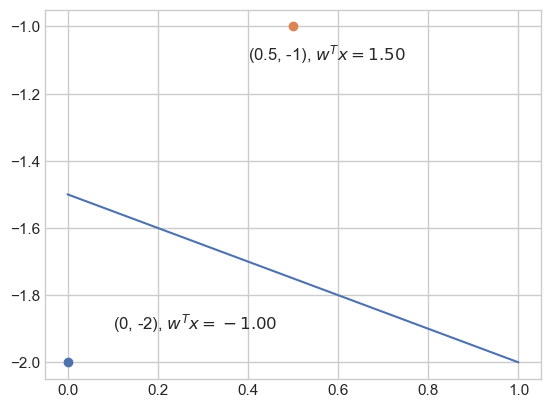

In [6]:
w = (1, 2, 3)
P1, P2 = 0, 1
Y1, Y2 = -(w[0]*P1 + w[2])/w[1], -(w[0]*P2 + w[2])/w[1]
plt.plot([P1, P2], [Y1, Y2])
plt.grid(True)

A = [0, -2]
plt.scatter(A[0], A[1])
plt.text(A[0]+0.1, A[1]+0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))

A = [0.5, -1]
plt.scatter(A[0], A[1])
plt.text(A[0]-0.1, A[1]-0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))

plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Logistic Regression. Немного/много теории:) <a name='logreg'></a><a name='logreg'></a>

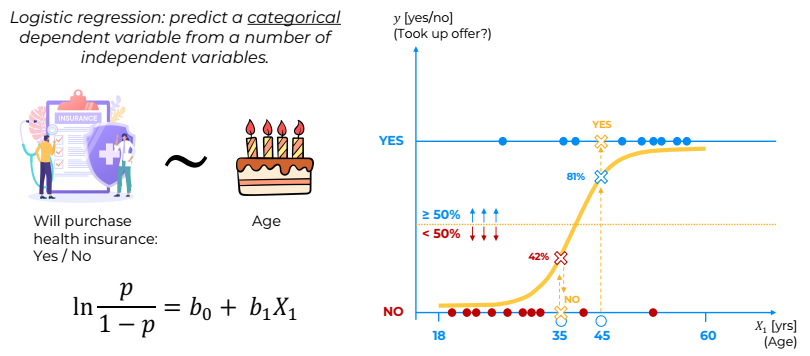

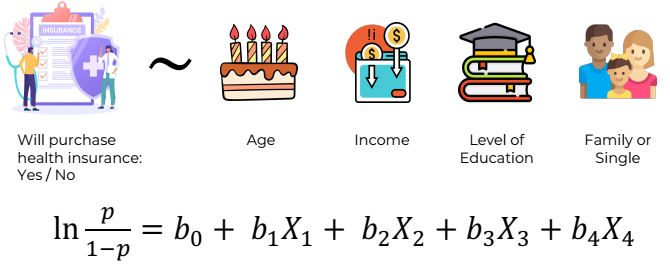

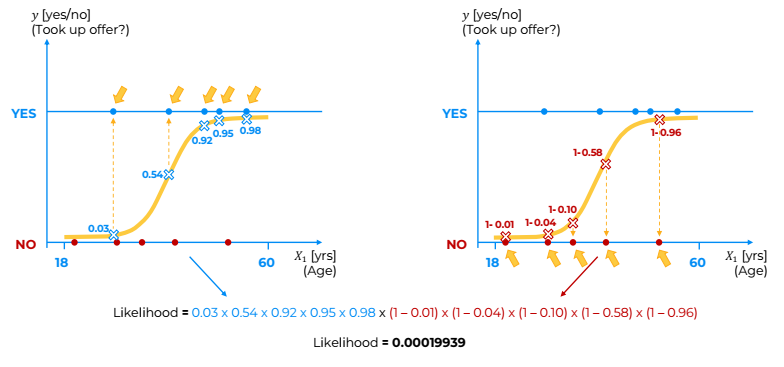

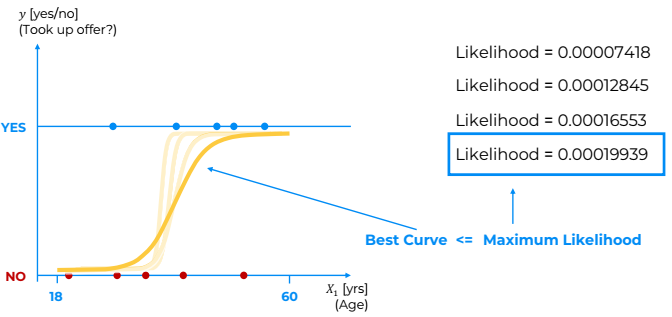

Частным случаем линейного классификатора является логистическая регрессия, с помощью которой можно не только классифицировать объекты, но и определять вероятность отнесения объекта к определенному классу..

В задаче бинарной классификации обозначим через вероятность $p_+$ отнесение объекта $x_i$ к классу "+" (в этом случае $P_-$ это вероятность отнесения к противоположному классу). То есть для всех объектов $x_i$ и вектора весов $\vec{w}$ мы имеем вероятности отнесения к классу "+" (в этом случае условимся, что целевая переменная получает значение $1$, $y_i=1$) и к классу "-" (в этом случае $y_i=-1$):
$$p_+ = P\left(y_i = 1 \mid x_i, w\right)$$
$$p_- = P\left(y_i = -1 \mid x_i, w\right)$$

Искомая вероятность должна принимать значения от $0$ до $1$: $p_+ \in [0,1]$, но с помощью линейного классификатора мы получаем значения: $a(\vec{x}) = \vec{w}^T \vec{x} \in R = (-\infty,\infty)$. 
В модели логистической регрессии для перехода от $R=(-\infty,\infty)$ к отрезку $[0,1]$ берется сигмоид-функция: 

$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$.

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

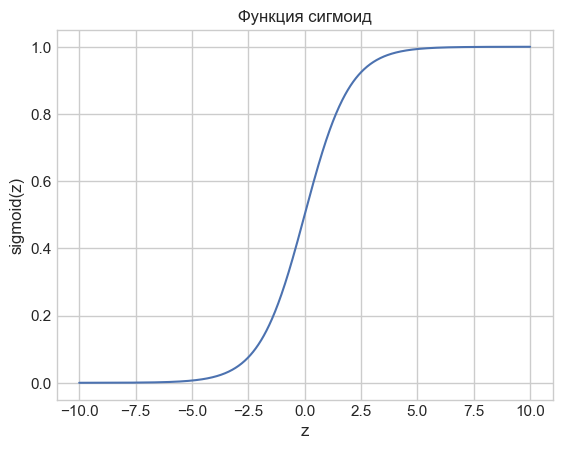

In [19]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, [sigmoid(x) for x in xs]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.title('Функция сигмоид');

Если $P(X)$ это вероятность события $X$, то $\frac{P(X)}{1-P(X)}$ это отношение вероятностей "событие произойдет" и "событие не произойдет" (отношение шансов). Вероятность и отношение шансов содержат одинаковую информацию, но $P(X)$ находится в пределах от 0 до 1, а отношение шансов - в пределах от 0 до $\infty$. Если вычислить логарифм отношения шансов (также называется "логарифм шансов", или логарифм отношения вероятностей), то его выражение будет принимать значения от $-\infty$ до $\infty$
$$
\log \left( \frac{P}{1-P} \right) \in [-\infty, \infty].
$$

С помощью логарифма шансов сделаем прогноз $p_+ = P\left(y_i = 1 \mid x_i, \vec{w}\right)$. Для этого вычислим значение $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \vec{w}^T \vec{x}$, после чего вычислим логарифм отношения шансов 
$$ 
\log \left( \frac{P}{1-P} \right) =  \vec{w}^T \vec{x},
$$
$$ 
e^{\log \left( \frac{P}{1-P} \right)} =  \frac{P}{1-P} = e^{\vec{w}^T \vec{x}},
$$
$$P = \frac{e^{\vec{w}^T \vec{x}}}{1 + e^{\vec{w}^T\vec{x}}} =  
\frac{1}{1 + e^{-\vec{w}^T\vec{x}}} = \sigma(\vec{w}^T \vec{x})
$$


В правой части мы получили как раз сигмоид-функцию.

Итак, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели и вектора признаков примера:

$$p_+(x_i) = P\left(y_i = 1 \mid \vec{x}_i, \vec{w} \right) = \sigma(\vec{w}^T \vec{x}_i).$$


При обучении модели логистической регрессии веса модели $\vec{w}$ подбираются таким образом, чтобы минимизировать целевую функцию - логистическую функцию потерь (определяется далее). То есть решается оптимизационная задача.

Логистическая регрессия моделирует вероятность отнесения примера к классу "+"

$$
p_+(\vec{x}_i) = P\left(y_i = 1 \mid \vec{x}_i, \vec{w}\right) = 
\sigma(\vec{w}^T\vec{x}_i)
$$

Тогда для класса "-":

$$
p_-(\vec{x}_i)  = P\left(y_i = -1 \mid \vec{x}_i, \vec{w} \right)  = 
1 - \sigma(\vec{w}^T \vec{x}_i) = \sigma(-\vec{w}^T \vec{x}_i) 
$$

Этих выражения можно объединить в одно:

$$
P\left(y = y_i \mid \vec{x}_i, \vec{w} \right) = 
\sigma(y_i \vec{w}^T \vec{x}_i)
$$

Выражение $M(\vec{x}_i) = y_i\vec{w}^T \vec{x}_i$ называется отступом (margin) классификации на объекте $\vec{x}_i$. 
Если он неотрицателен, модель не ошибается на объекте $\vec{x}_i$, если же отрицателен – значит, класс для $\vec{x}_i$  спрогнозирован неправильно. 
Заметим, что отступ определен для объектов именно обучающей выборки, для которых известны реальные метки целевого класса $y_i$.


Из курса линейной алгебры известно, что расстояние от точки с радиус-вектором $\vec{x}_A$ до плоскости, которая задается уравнением $\vec{w}^T \vec{x} = 0$ вычисляется по формуле
$$
\rho(\vec{x}_A, \vec{w}^T \vec{x} = 0) = \frac{\vec{w}^T \vec{x}_A}{||\vec{w}||}
$$


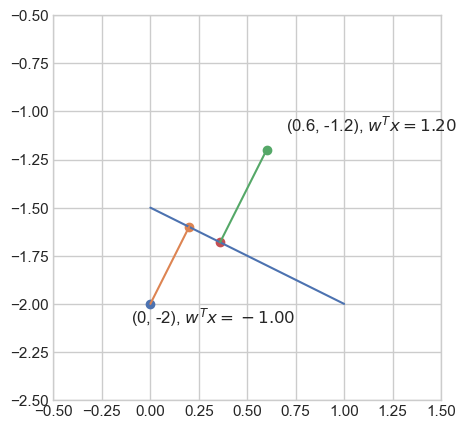

In [20]:
plt.rcParams['figure.figsize']=(5,5)
plt.xlim(-0.5, 1.5)
plt.ylim(-2.5, -0.5)

w = (1, 2, 3)
P1, P2 = 0, 1
Y1, Y2 = -(w[0]*P1 + w[2])/w[1], -(w[0]*P2 + w[2])/w[1]
plt.plot([P1, P2], [Y1, Y2])
plt.grid(True)

A = [0, -2]
plt.scatter(A[0], A[1])
plt.text(A[0]-0.1, A[1]-0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))
AX1 = (-w[0]*w[2]+w[1]**2*A[0]-w[0]*w[1]*A[1])/(w[0]**2+w[1]**2)
AY1 = (-w[1]*w[2]+w[0]**2*A[1]-w[0]*w[1]*A[0])/(w[0]**2+w[1]**2)
plt.scatter(AX1, AY1)
plt.plot([A[0],AX1], [A[1], AY1])

A = [0.6, -1.2]
plt.scatter(A[0], A[1])
plt.text(A[0]+0.1, A[1]+0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))
AX1 = (-w[0]*w[2]+w[1]**2*A[0]-w[0]*w[1]*A[1])/(w[0]**2+w[1]**2)
AY1 = (-w[1]*w[2]+w[0]**2*A[1]-w[0]*w[1]*A[0])/(w[0]**2+w[1]**2)
plt.scatter(AX1, AY1)
plt.plot([A[0],AX1], [A[1], AY1])

plt.show()

То есть чем больше по модулю выражение $\vec{w}^T \vec{x}_i$, тем дальше точка $\vec{x}_i$ находится от плоскости $\vec{w}^T \vec{x} = 0$.

Оценим вероятность наблюдения вектора целей $\vec{y}$ для выборки $X$, где матрица $X$ составлена из векторов признаков наблюдаемых объектов $\vec{x_i}$.

$$
P \left(\vec{y} \mid X, \vec{w} \right) = \prod_{i=1}^{l} P \left(y = y_i \mid \vec{x}_i, \vec{w}\right),
$$

где $l$ – число строк матрицы $X$ (длина выборки).

Для упрощения вычислений возьмем логарифм от правой и левой частей выражения.

$$
\log P \left(\vec{y} \mid X, \vec{w} \right) = 
\log \sum_{i=1}^{l} P \left(y = y_i \mid \vec{x}_i, \vec{w} \right) = \log \prod_{i=1}^{l} \sigma(y_i\vec{w}^T\vec{x}_i)   
= 
$$

$$
= 
\sum_{i=1}^{l} \log \sigma ( y_i \vec{w}^T \vec{x}_i ) = \sum_{i=1}^{l} \log \frac{1}{1 + \exp^{-y_i\vec{w}^T \vec{x}_i }}
$$

$$
= - \sum_{i=1}^{l} \log (1 + \exp^{-y_i \vec{w}^T \vec{x}_i})
$$

То есть в данном случае принцип максимизации правдоподобия приводит к минимизации выражения 

$$
L_{log} (X, \vec{y}, \vec{w}) = 
\sum_{i=1}^{l} \log (1 + \exp^{-y_i\vec{w}^T\vec{x}_{i}}).
$$

Это логистическая функция потерь, она получается суммированием по всем объектам обучающей выборки.

Посмотрим на новую фунцию как на функцию от отступа: $L(M) = \log (1 + \exp^{-M})$. 

Нарисуем ее график, а также график 1/0 функциий потерь (zero-one loss), которая просто штрафует модель на 1 за ошибку на каждом объекте (отступ отрицательный): $L_{1/0}(M) = [M < 0]$.

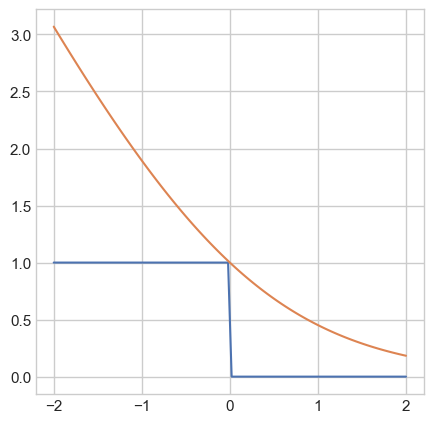

In [21]:
def f1(x):
    if x<=0:
        return 1
    else:
        return 0

def f2(x):
    return(np.log2(1+np.exp(-x)))

xs = np.linspace(-2,2,100)
plt.grid(True)
plt.plot(xs, [f1(i) for i in xs])
plt.plot(xs, [f2(i) for i in xs])
plt.show()

Наиболее точно описывает ошибки при классификации 1/0 функция потерь $L_{1/0}$, которая просто штрафует модель на $1$ при каждой ошибке.
Однако 1/0 функцию потерь нельзя оптимизировать градиентными методами, поскольку производная в нуле обращается в бесконечность. Поэтому минимазация проводится для верхней оценки 1/0 функции потерь - логистической функции потерь $L_{\log}$

$$
L_{\text{1/0}} (X, \vec{y}, \vec{w}) = 
\sum_{i=1}^{l} [M(\vec{x}_i) < 0] \leq \sum_{i=1}^{l} \log (1 + \exp^{-y_i\vec{w}^T \vec{x}_i}) = 
L_{\log} (X, \vec{y}, \vec{w}), 
$$

где $L_{\text{1/0}} (X, \vec{y}, \vec{w})$ – число ошибок логистической регрессии с весами $\vec{w}$ 
на выборке $(X, \vec{y})$.

То есть при уменьшениия верхней оценки функции $L_{\log}$ на число ошибок классификации уменьшается и само число ошибок.

Регуляризация используется для борьбы с переобучением. При $L_2$-регуляризации минимизируется функция:

$$
M(X, \vec{y}, \vec{w}) = L_{\log} (X, \vec{y}, \vec{w}) + \lambda |\vec{w}|^2
$$

В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$. И тогда решением задачи будет

$$
\widehat{\vec{w}}  = \arg \min_{\vec{w}} M(X, \vec{y}, \vec{w}) =  
$$
$$
=
\arg \min_{\vec{w}} (C \sum_{i=1}^{l} \log (1 + \exp^{-y_i\vec{w}^T \vec{x}_i})+ |\vec{w}|^2).
$$ 


## Наконец пример простой

In [13]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(X_test)
# pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
labels_logreg = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_logreg

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,0,1
98,1,1


In [15]:
labels_logreg.value_counts()

y_pred  y_test
0       0         65
1       1         24
0       1          8
1       0          3
dtype: int64

In [16]:
print(classifier.predict(sc.transform([[30,87000]]))) # Прогноз на новом результате

[0]


In [17]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

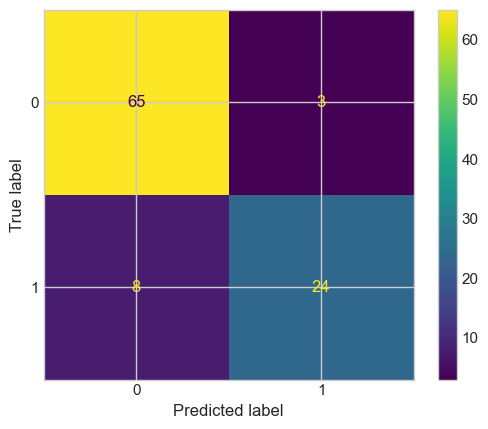

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

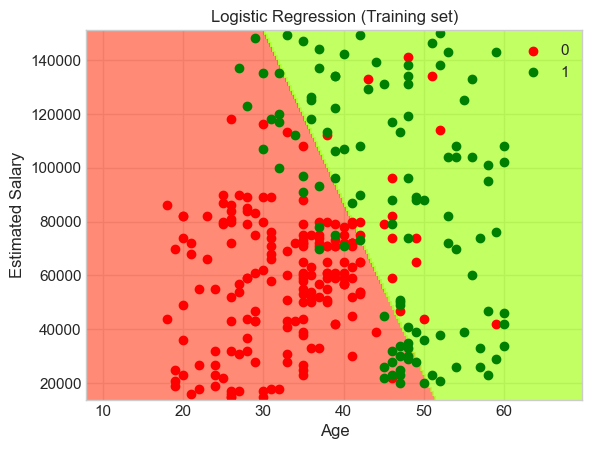

In [19]:
# Train set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

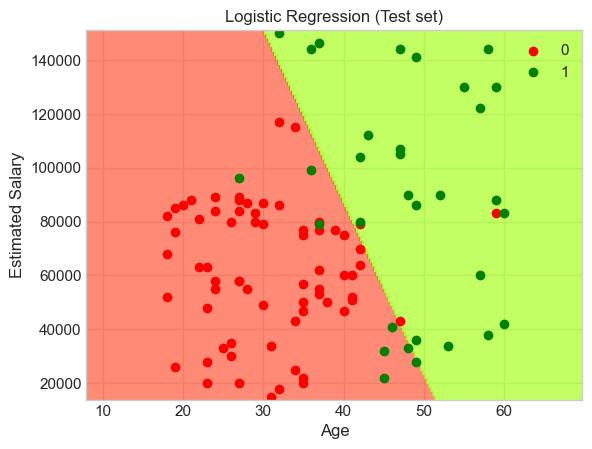

In [20]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# K-Nearest Neighbors (K-NN) <a name='knn'></a>

Метод "К ближайших соседей" (K nearest neighbors, KNN) популярный метод в задачах классификации, но иногда используется в задачах регрессии. Метод заключается в том, что для определения значения неизвестного признака $p$ заданного элемента $E$ определяются ближайшие элементы ("соседи") элемента $E$ и для этой группы соседей определяется среднестатистическое значение признака, которое необходимо определить для исходного элемента $E$ (мы имеем схожие черты с нашим ближайшим окружением). Для работы этого метода необходимо, чтобы было задано "расстояние" между элементами (для определения ближайших соседей как находящихся на кратчайшем расстоянии).

Проиллюстрируем работу метода на простом примере - с помощью векторов чисел, для каждого из которых определен признак цвета: красный (False) или желтый (True). Зададим множество векторов (пар чисел, которые удобно отображать точками на плоскости) и определим для каждого значение признака "желтый" или "красный". $X$, $Y$ - массивы абсцисс и ординат точек, $l$ - массив значений (True, False). Искусственно сгруппируем точки таким образом, чтобы справа вверху и слева внизу преобладали красные точки, а слева вверху и справа внизу - желтые. Используем функцию numpy.r_(), которая объединяет два массива.

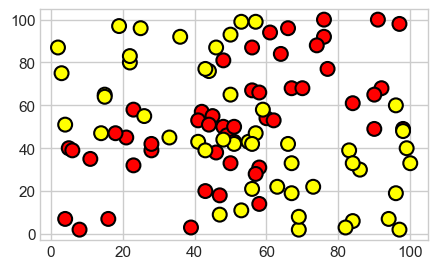

In [30]:
np.random.seed(17)
f = np.random.randint(low=1, high=61, size=(25,2))
X = [i[0] for i in f]; Y = [i[1] for i in f]; l = [False for _ in range(25)]

f = np.random.randint(41, 101, (25,2))
X = np.r_[X,[i[0] for i in f]]; Y = np.r_[Y,[i[1] for i in f]]; l = np.r_[l,[False for _ in range(25)]]

f = [[np.random.randint(1,61), np.random.randint(41,101)] for _ in range(25)]
X = np.r_[X,[i[0] for i in f]]; Y = np.r_[Y,[i[1] for i in f]]; l = np.r_[l,[True for _ in range(25)]]

f = [[np.random.randint(41,101), np.random.randint(1,61)] for _ in range(25)]
X = np.r_[X,[i[0] for i in f]]; Y = np.r_[Y,[i[1] for i in f]]; l = np.r_[l,[True for _ in range(25)]]

plt.rcParams['figure.figsize'] = (5,3)
plt.scatter(X, Y, c=l, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);

Возьмем произвольную точку $A$ с координатами (10,10) и определим для нее группы из 3, 5, 11, 71 ближайших соседей. Расстояние между двумя точками $(x_0, y_0)$ и $(x_1, y_1)$ определяется по формуле
$$
\rho = \sqrt{(x_1 - x_0)^2+(y_1 - y_0)^2},
$$
и эти расстояния от всех точек до точки $A(10,10)$ будут храниться в списке $dist$. Отсортируем список $dist$ и сохраним в список $indexes$ индексы ближайших к $A$ соседей.

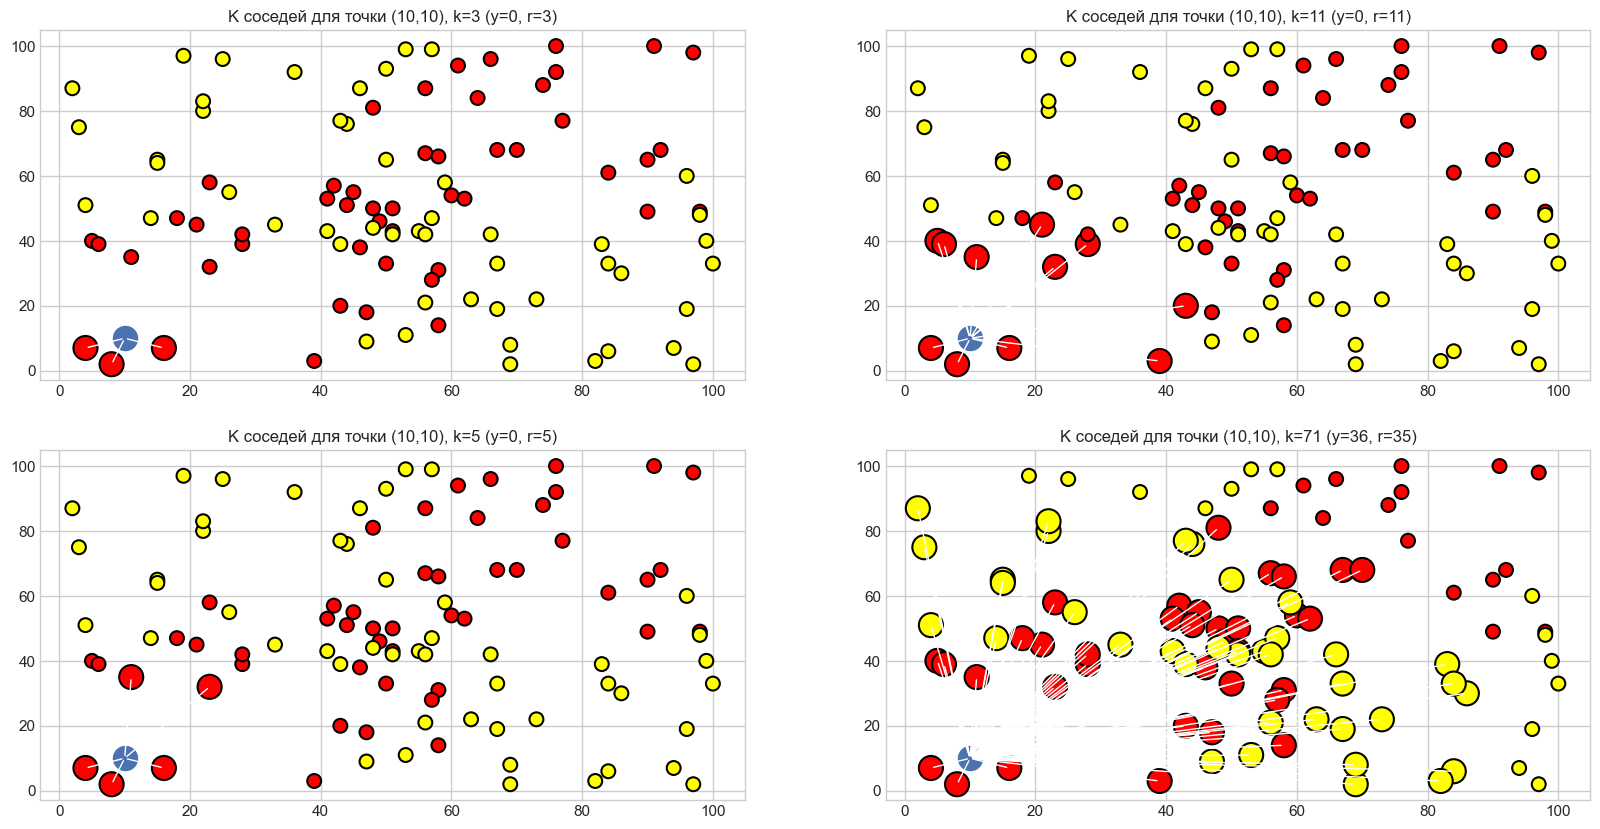

In [31]:
A = (10, 10)
dist = [(i, np.sqrt((X[i]-A[0])**2+(Y[i]-A[1])**2)) for i in range(len(X))]

plt.rcParams['figure.figsize']=(20,10)
fig, ax = plt.subplots(2, 2)
for pos, n in enumerate([3, 5, 11, 71]):
    indexes = [i for (i, _) in sorted(dist, key=lambda x: x[1])[:n]]
    sizes = [300 if i in indexes else 100 for i in range(100)]
    ax[pos%2][pos//2].scatter(X, Y, c=l, s=sizes, cmap='autumn', edgecolors='black', linewidth=1.5);
    ax[pos%2][pos//2].scatter(A[0], A[1], c='b', s=300)
    y, r = 0, 0
    for i in indexes:
        if l[i]: r+=1 
        else: y+=1
        ax[pos%2][pos//2].annotate (u'', 
                                    xy=(A[0], A[1]), 
                                    xytext = (X[i], Y[i]),
                                    arrowprops = {'arrowstyle': '-'})
    ax[pos%2][pos//2].set_title("K соседей для точки ({},{}), k={} (y={}, r={})".format(A[0], A[1], n, r, y))
plt.show()

На диаграммах видим новую точку $A$ и ближайшие к ней $K$ соседей, а также статистику цвета "желтый-красный" для данной группы соседей. Далее признак для новой точки выбирается как наиболее часто встречающийся среди $K$ соседей. В том случае если количество желтых и красных примерно (или строго) равно - можно уменьшить количество соседей. Этот процесс можно продолжать, в итоге в самом плохом случае останется один сосед ($K$=1) с помощью которого можно определить искомое значение признака.

Из приведенного примера ясно, что количество соседей $K$ имеет сильное влияние на качество работы метода. Для слишком малого или, наоборот, слишком большого числа соседей не удастся получить качественную статистику для группы. Например, для малых значений $n$=3 и $n$=5 цвет определяется одназначно, но для $n$=71 оценка даже меняется на противоположную, так как в группе из 71 соседа начинают преобладать "желтые".

Для повышения точности вклад соседей в получение оценки для элемента может учитывать удаленность соседа от элемента - для более удаленных соседей вклад меньше (т.е. к оценке добавляется вес, с учетом расстояния).

## Метрики
Манхэтенская метрика
$$
\rho(x,y) = \sum_{i=1}^{n}{|x_i-y_i|}
$$

Евклидова метрика
$$
\rho (x,y) = \sqrt{\sum_{i=1}^{n}{(x_i-y_i)^2}}
$$

Метрика Минковского (обобщение евклидовой и манхэттенской метрик)
$$
\rho(x,y) = \left( \sum_{i=1}^{n}{|x_i - y_i|^p} \right)^\frac{1}{p}
$$

Косинусное расстояние
$$
\rho(x,y)=\cos(\alpha) = \frac{x \cdot y }{|x||y|} = 
\frac{\sum_{i=1}^{n}{x_i y_i}}{\sum_{i=1}^{n}{x_i^2} \sum_{i=1}^{n}{y_i^2}}
$$

In [21]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
print(classifier.predict(sc.transform([[30,87000]]))) # прогноз на новых данных

[0]


In [23]:
y_pred = classifier.predict(X_test)
# pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
labels_knn = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_knn

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


In [24]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

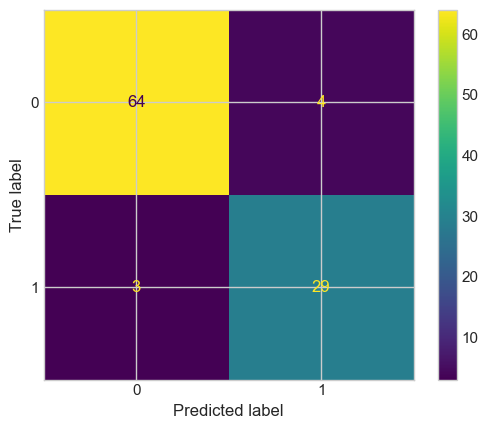

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

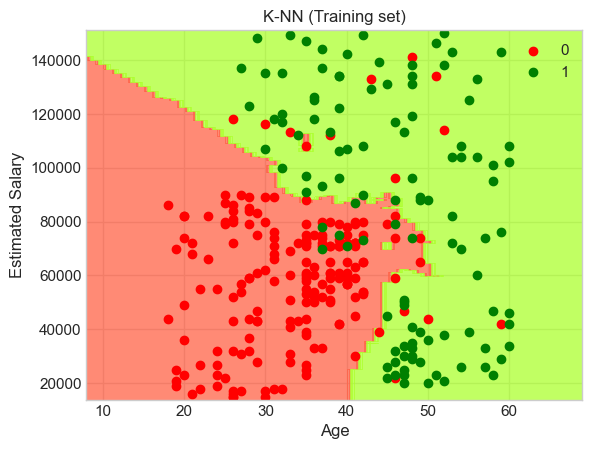

In [26]:
# Train Set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

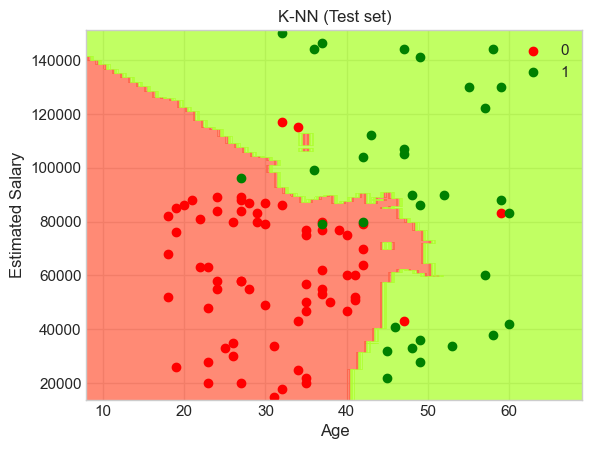

In [27]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# SVM <a name='svm'></a>

* [SVM](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2_(SVM))
* [Еще об SVM](https://python-school.ru/blog/svm_classifier/)

SVM основывается на концепции поиска оптимальной гиперплоскости в многомерном пространстве данных, которая наилучшим образом разделяет точки данных разных классов в случае классификации или наилучшим образом аппроксимирует данные в случае регрессии. Гиперплоскость - это линейное разделение, которое максимизирует отступы (margins) между точками данных и самой гиперплоскостью.

Вот ключевые концепции и компоненты SVM:

1. **Гиперплоскость**: Это линейное разделение между двумя классами в задаче классификации или аппроксимация в задаче регрессии. Гиперплоскость выбирается таким образом, чтобы максимизировать отступы между точками данных и самой гиперплоскостью.

2. **Опорные векторы**: Опорные векторы - это точки данных, которые лежат ближе всего к гиперплоскости и играют ключевую роль в определении гиперплоскости. Они используются для определения отступов и, следовательно, влияют на обучение модели.

3. **Ядра**: SVM может использовать различные ядра (например, линейные, полиномиальные, радиально-базисные функциональные (RBF) и другие) для преобразования данных в более высокоразмерное пространство. Ядра позволяют SVM решать задачи, которые не могут быть линейно разделены в исходном пространстве.

4. **Параметр регуляризации C**: Параметр C в SVM контролирует баланс между максимизацией отступов и минимизацией ошибок на обучающих данных. Большие значения C могут привести к более жесткой классификации, что может вызвать переобучение, тогда как маленькие значения C могут привести к более широким отступам, но могут допускать больше ошибок.

5. **Многоклассовая классификация**: SVM по умолчанию предназначен для двоичной классификации, но его можно расширить до задач многоклассовой классификации с использованием методов, таких как "один против всех" (one-vs-all) или "один против одного" (one-vs-one).

SVM является мощным и гибким методом машинного обучения и широко используется в различных областях, включая компьютерное зрение, обработку естественного языка, биоинформатику и многие другие.

**Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.**

**Преимущества и недостатки SVM** 

*Преимущества SVM перед методом стохастического градиента и нейронными сетями:*

- Задача выпуклого квадратичного программирования хорошо изучена и имеет единственное решение.
- Метод опорных векторов эквивалентен двухслойной нейронной сети, где число нейронов на скрытом слое определяется автоматически как число опорных векторов.
- Принцип оптимальной разделяющей гиперплоскости приводит к максимизации ширины разделяющей полосы, а следовательно, к более уверенной классификации.

*Недостатки классического SVM:*

- Неустойчивость к шуму: выбросы в исходных данных становятся опорными объектами-нарушителями и напрямую влияют на построение разделяющей гиперплоскости.
- Не описаны общие методы построения ядер и спрямляющих пространств, наиболее подходящих для конкретной задачи.
- Нет отбора признаков.
- Необходимо подбирать константу `C` при помощи кросс-валидации.

## Еще немного теории

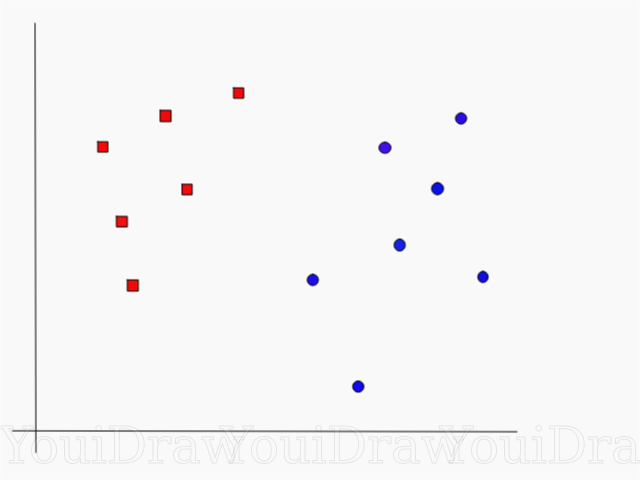

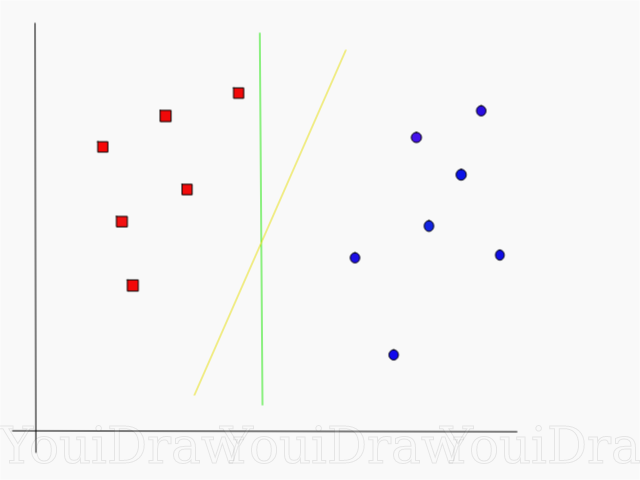

### Как SVM находит лучшую линию

Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются опорными векторами. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние которое называется зазором. Основная цель алгоритма — максимизировать расстояние зазора. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

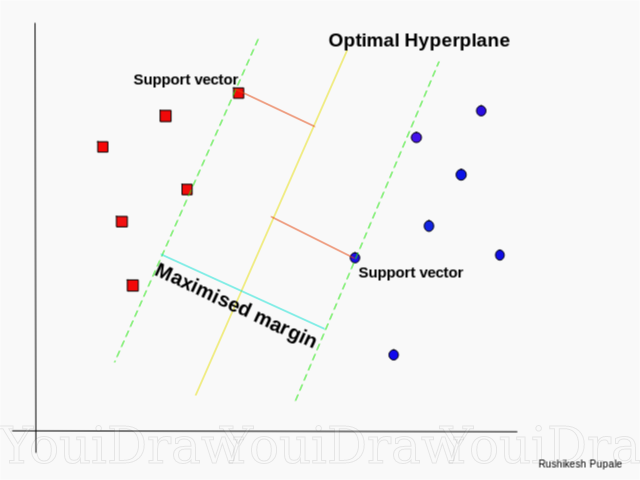

В функции потерь SVM используется концепция зазора (margin), которая представляет собой расстояние между гиперплоскостью и ближайшими точками разных классов. Цель состоит в том, чтобы максимизировать зазор, при этом допустимо допускать ошибки классификации. Если объекты невозможно разделить линейной гиперплоскостью, то используется мягкая граница (soft margin), которая позволяет допустить ошибки классификации и при этом сохранить разделяющую гиперплоскость.

Рассмотрим следующий пример, с более сложным датасетом, который нельзя разделить линейно.

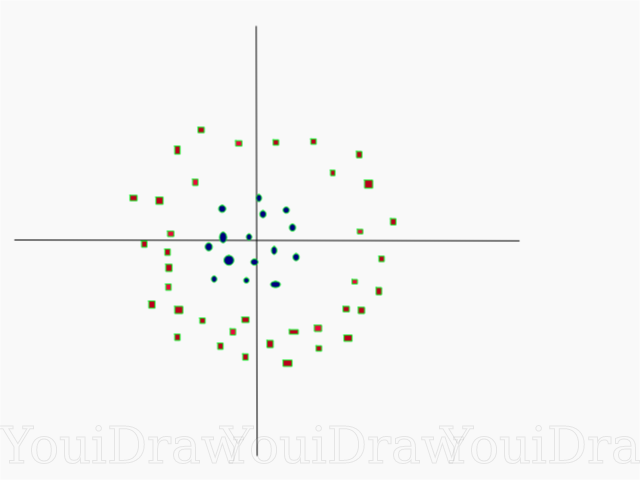

Очевидно, что этот набор данных нельзя разделить линейно. Мы не можем начертить прямую линию, которая бы классифицировала эти данные. Но, этот датасет можно разделить линейно, добавив дополнительное измерение, которое мы назовем осью Z. Представим, что координаты на оси Z регулируются следующим ограничением:

$$z=x+y$$

Таким образом, ордината Z представлена из квадрата расстояния точки до начала оси.
Ниже приведена визуализация того же набора данных, на оси Z.

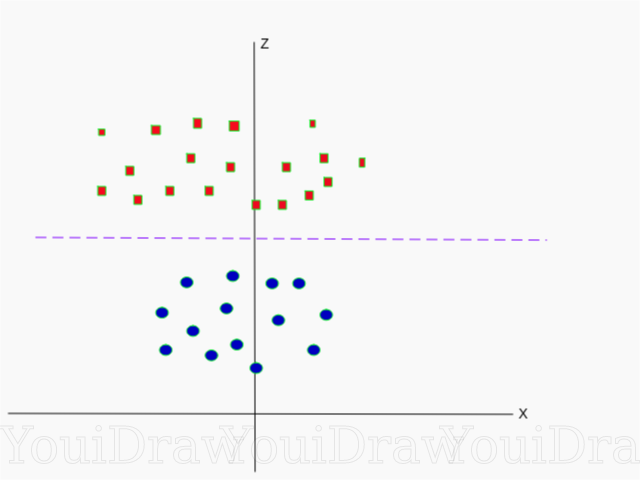


Теперь данные можно разделить линейно. Допустим пурпурная линия разделяющая данные z=k, где k константа. Если 
$$z=x+y$$

, то следовательно и

$$k=x+y$$

— формула окружности. Таким образом, мы можем спроэцировать наш линейный разделитель, обратно к исходному количеству измерений выборки, используя эту трансформацию.

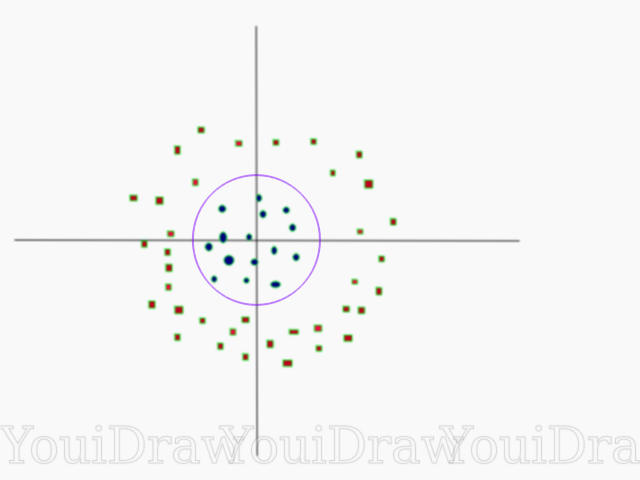

**Гиперплоскость**

Теперь, когда мы ознакомились с логикой алгоритма, перейдем к формальному определению гиперплоскости

Гиперплоскость — это n-1 мерная подплоскость в n-мерном Евклидовом пространстве, которая разделяет пространство на две отдельные части.

Например, представим что наша линия представлена в виде одномерного Евклидова пространства (т.е. наш набор данных лежит на прямой). Выберите точку на этой линии. Эта точка разделит набор данных, в нашем случае линию, на две части. У линии есть одна мера, а у точки 0 мер. Следовательно, точка — это гиперплоскость линии.

Для двумерного датасета, с которым мы познакомились ранее, разделяющая прямая была той самой гиперплоскостью. Проще говоря, для n-мерного пространства существует n-1 мерная гиперплоскость, разделяющая это пространство на две части.

**Параметры**

1. `С` - Данный параметр помогает отрегулировать ту тонкую грань между “гладкостью” и точностью классификации объектов обучающей выборки. Чем больше значение “С” тем больше объектов обучающей выборки будут правильно классифицированы.
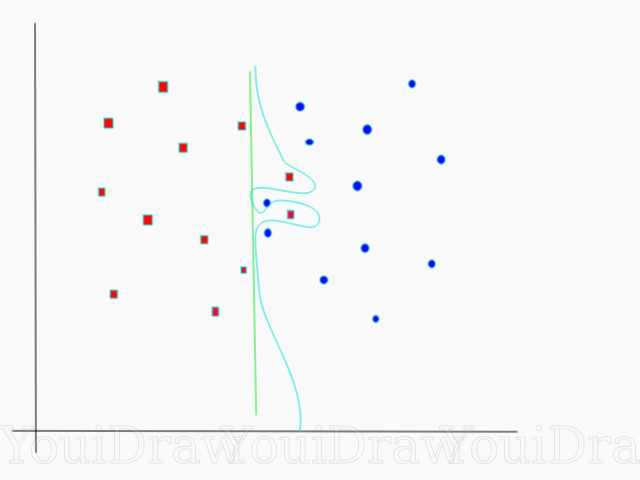

В данном примере есть несколько порогов принятия решений, которые мы можем определить для этой конкретной выборки. Обратите внимание на прямую (представлена на графике в виде зеленой линии) порога решений. Она довольно таки проста, и по этой причине, несколько объектов были классифицированы неверно. Эти точки, которые были классифицированы неправильно называются выбросами в данных.

Мы также можем настроить параметры таким образом, что в конечном итоге получим более изогнутую линию (светло-голубой порог решений), которая будет классфицировать асболютно все данные обучающей выборки правильно. Конечно, в таком случае, шансы того, что наша модель сможет генерализовать и показать столь же хорошие результаты на новых данных, катастрофически мала. Следовательно, если вы пытаетесь достигнуть точности при обучении модели, вам стоит нацелиться на что-то более ровное, прямое. Чем выше число “С” тем более запутанная гиперплоскость будет в вашей модели, но и выше число верно-классифицированных объектов обучающей выборки. Поэтому, важно “подкручивать” параметры модели под конкретный набор данных, чтобы избежать переобучения но, в то же время достигнуть высокой точности.

2. `gamma` - В официальной документации библиотека SciKit Learn говорится, что гамма определяет насколько далеко каждый из элементов в наборе данных имеет влияние при определении “идеальной линии”. Чем ниже гамма, тем больше элементов, даже тех, которые достаточно далеки от разделяющей линии, принимают участие в процессе выбора этой самой линии. Если же, гамма высокая, тогда алгоритм будет “опираться” только на тех элементах, которые наиболее близки к самой линии.

Если задать уровень гаммы слишком высоким, тогда в процессе принятия решения о расположении линии будут учавствовать только самые близкие к линии элементы. Это поможет игнорировать выбросы в данных. Алгоритм SVM устроен таким образом, что точки расположенные наиболее близко относительно друг друга имеют больший вес при принятии решения. Однако при правильной настройке «C» и «gamma» можно добиться оптимального результата, который построит более линейную гиперплоскость игнорирующую выбросы, и следовательно, более генерализуемую.

SVM является гибким алгоритмом, который позволяет использовать различные ядра для выполнения нелинейного преобразования данных. Классические ядра, такие как линейное, полиномиальное и радиально-базисное, могут быть использованы для преобразования данных в более высокое измерение. Также возможно создание собственных ядер, которые позволяют адаптировать алгоритм SVM к конкретным задачам.


In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [29]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [30]:
y_pred = classifier.predict(X_test)

labels_svm = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_svm

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,0,1
98,1,1


In [31]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[66  2]
 [ 8 24]]


0.9

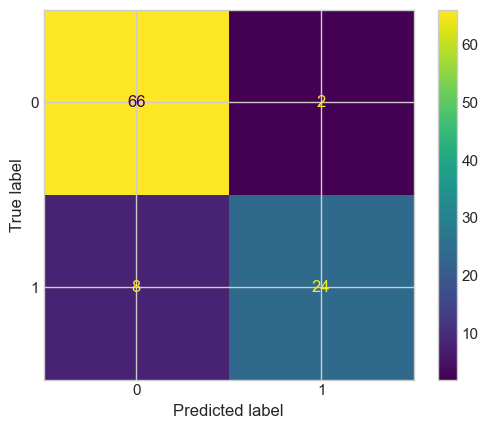

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

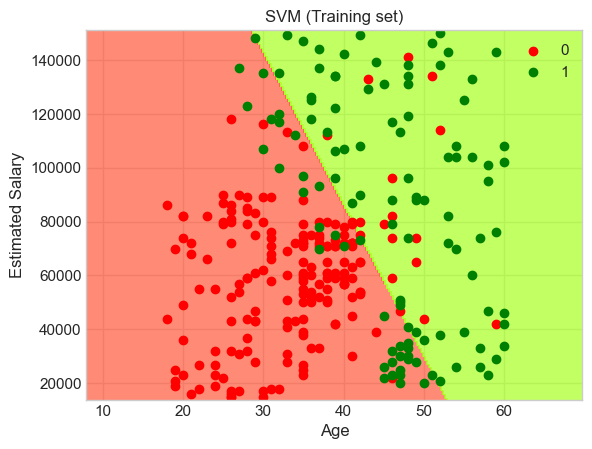

In [33]:
# Train set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

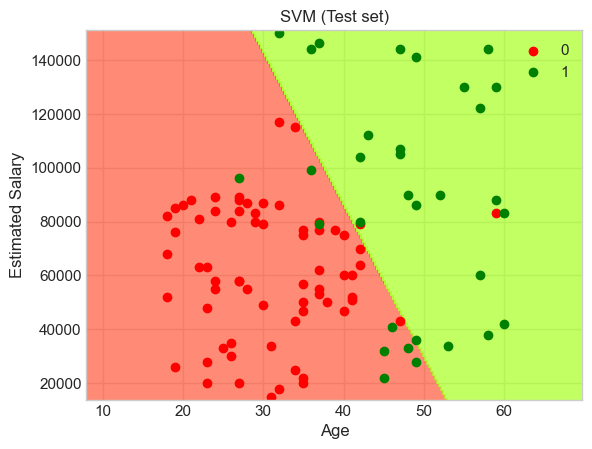

In [34]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Kernel SVM <a name='kSVM'></a>

Метод опорных векторов (SVM) использует ядро (kernel) для преобразования пространства данных, в котором находятся объекты, чтобы разделить их на классы. Ядро определяет функцию сходства между объектами в новом пространстве признаков.

Вот четыре основных ядра, которые мы рассмотрим в нашем примере ниже:

- Линейное ядро (Linear kernel) — это самое простое ядро, которое строит гиперплоскость для разделения данных. Оно часто используется в задачах с линейно разделимыми данными. В математическом смысле линейное ядро вычисляет скалярное произведение между векторами признаков объектов.
- Ядро Radial Basis Function (RBF) — это наиболее распространенное ядро, которое может разделять данные, не являющиеся линейно разделимыми. Оно создает границу принятия решений в виде радиально-симметричного колокола.
- Ядро с полиномиальной функцией (Polynomial kernel) — это ядро, которое вводит полиномиальную функцию в пространство признаков для разделения данных. Это может быть полезно для данных, которые не могут быть разделены гиперплоскостью.
- Ядро с сигмоидной функцией (Sigmoid kernel) — это ядро, которое используется для моделирования нейронных сетей. Оно может работать с нелинейными данными, но не так эффективно, как RBF-ядро.

Каждое ядро может иметь свои параметры, которые могут быть настроены для улучшения производительности модели.


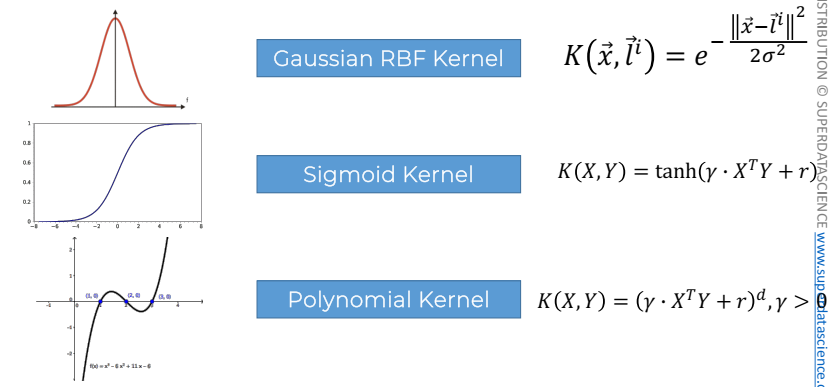

In [35]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [36]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [37]:
y_pred = classifier.predict(X_test)
# pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
labels_svm_kernel = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_svm_kernel

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


In [38]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

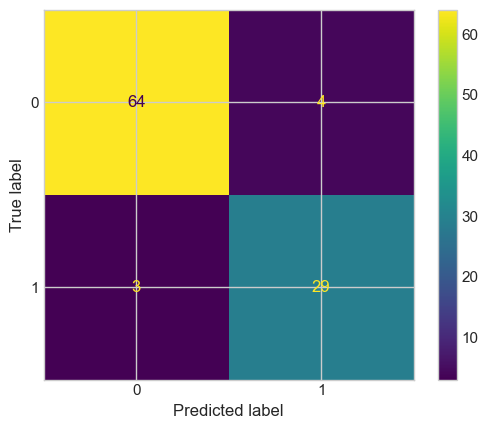

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

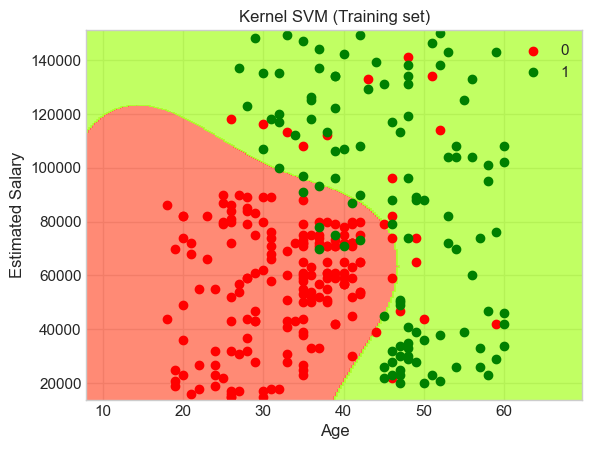

In [40]:
# Train set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

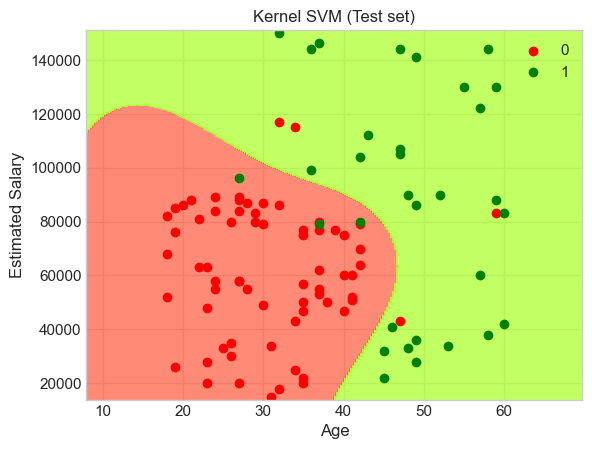

In [41]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Naive Bayes <a name='naivebayes'></a>

Наивный байесовский классификатор (Naive Bayes classifier) в машинном обучении основан на теореме Байеса и используется для задачи классификации. Этот классификатор предполагает "наивное" (простое) предположение о независимости признаков внутри каждого класса, что означает, что все признаки считаются независимыми друг от друга для данного класса. Несмотря на это упрощение, наивный байесовский классификатор часто работает хорошо на практике.

Для классификации элемента данных с использованием наивного байесовского классификатора используется теорема Байеса:

$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$

Где:
- $P(C|X)$ - это апостериорная вероятность класса $C$ при условии, что наблюдается элемент данных $X$.
- $P(X|C)$ - это вероятность наблюдения элемента данных $X$ при условии, что классифицируемый класс - $C$.
- $P(C)$ - это априорная вероятность класса $C$, то есть вероятность, что элемент данных будет принадлежать классу $C$ до учета признаков.
- $P(X)$ - это общая вероятность элемента данных $X$.

Для классификации элемента данных, вычисляются апостериорные вероятности $P(C|X)$ для каждого класса, и элемент данных присваивается классу с наибольшей апостериорной вероятностью.

Наивное предположение о независимости признаков позволяет упростить вычисление $P(X|C)$. Вместо того, чтобы оценивать совместные вероятности всех признаков, мы предполагаем, что они независимы и вычисляем их вероятности независимо:

$P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot \ldots \cdot P(x_n|C)$

Где $x_1, x_2, \ldots, x_n$ - признаки элемента данных $X$, а $P(x_i|C)$ - вероятность признака $x_i$ при условии класса $C$. Эти вероятности могут быть оценены с использованием обучающего набора данных.

Наивный байесовский классификатор может быть реализован с разными вероятностными распределениями для $P(x_i|C)$, такими как мультиномиальное распределение для дискретных признаков или гауссовское распределение для непрерывных признаков.

Важно отметить, что наивный байесовский классификатор, несмотря на свои упрощения, может работать довольно хорошо во многих задачах классификации, особенно на небольших и средних наборах данных.

Принцип работы наивного байесовского классификатора следующий:

1. Подготовка данных: Сначала необходимо подготовить обучающий набор данных, в котором каждый элемент имеет метку класса и набор признаков. Например, в задаче классификации текстовых документов, признаками могут быть слова, а метками - категории документов.

2. Оценка вероятностей: Для каждого класса вычисляются вероятности появления каждого признака. Эти вероятности могут быть оценены с использованием обучающего набора данных.

3. Расчет апостериорных вероятностей: После оценки вероятностей признаков для каждого класса, можно вычислить апостериорные вероятности для каждого класса для данного элемента данных с использованием теоремы Байеса.

4. Классификация: Элемент данных классифицируется как тот класс, для которого апостериорная вероятность наибольшая. То есть, элемент присваивается классу с наибольшей оцененной вероятностью.

Достоинства наивного байесовского классификатора:

1. Простота: Этот классификатор легко понять и реализовать.

2. Эффективность: В большинстве случаев, наивный байесовский классификатор работает достаточно быстро и может быть эффективен на небольших и средних наборах данных.

3. Работает с текстовыми данными: Он широко используется для анализа текстовых данных, таких как фильтрация спама, классификация документов и т. д.

Недостатки наивного байесовского классификатора:

1. Наивное предположение: Независимость признаков может быть несоблюдаемой в реальных данных, что может привести к снижению точности классификации.

2. Проблема нулевых вероятностей: Если какой-либо признак отсутствует в обучающем наборе данных для определенного класса, то вероятность этого класса для данного признака будет равна нулю, что может повлиять на результаты классификации.

3. Неспособность улавливать сложные зависимости: Наивный байесовский классификатор не может улавливать сложные зависимости между признаками.

Наивный байесовский классификатор может быть эффективным инструментом в задачах классификации, особенно в случае большого числа признаков и относительно небольшого объема данных. Он широко используется в задачах, таких как классификация текстов, фильтрация спама, диагностика болезней и других прикладных областях.

In [42]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [44]:
y_pred = classifier.predict(X_test)
# pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
labels_NB = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_NB

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


In [45]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 7 25]]


0.9

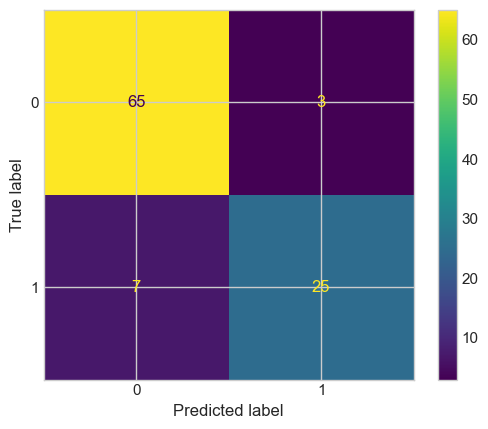

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

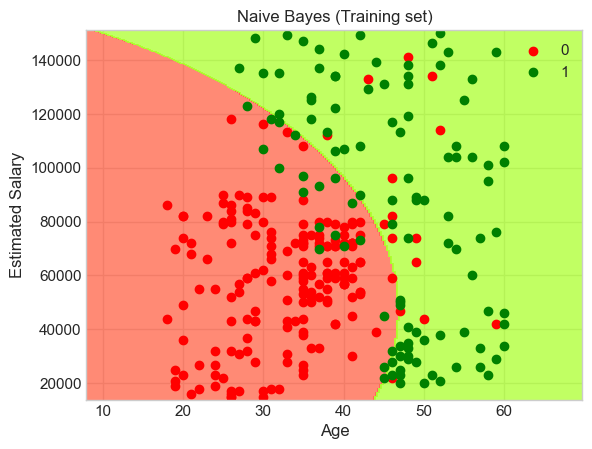

In [47]:
# Train set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

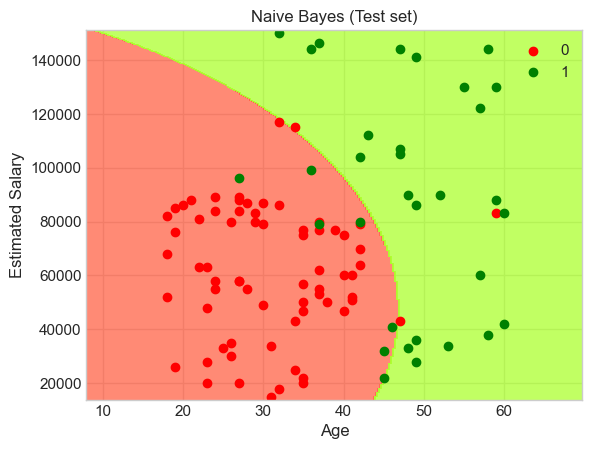

In [48]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Decision Tree <a name='dt'></a>

Деревья принятия решений - один из классических алгоритмов машинного обучения с учителем.

Дерево принятия решений (ДПР, другие названия – «дерево классификации», «регрессионное дерево», «решающее дерево») – инструмент прогнозного моделирования. В модели ДПР используется древовидная структура данных, которая описывает различные варианты принятия решений и результат для каждого из них. 

In [ ]:
plt.xlim(0,10)
plt.ylim(0,10)
plt.text(4.5, 9, "Возраст", size=20)
plt.annotate ('', xy=(5, 8.5), xytext = (3,7), arrowprops = dict(arrowstyle='<|-', facecolor='black', linewidth=2, color='black'))
plt.text(3, 8, "<16", size=14)
plt.annotate ('', xy=(5, 8.5), xytext = (7,7), arrowprops = dict(arrowstyle='<|-', facecolor='black', linewidth=2, color='black'))
plt.text(6, 8, ">16", size=14)
plt.text(6.5, 6, "Доход", size=20)
plt.annotate ('', xy=(7, 5.5), xytext = (5,3), arrowprops = dict(arrowstyle='<|-', facecolor='black', linewidth=2, color='black'))
plt.text(4.7, 4.5, ">5000", size=14)
plt.annotate ('', xy=(7, 5.5), xytext = (9,3), arrowprops = dict(arrowstyle='<|-', facecolor='black', linewidth=2, color='black'))
plt.text(8, 4.5, "<5000", size=14)
plt.text(3, 6, "-", size=20)
plt.text(5, 2, "+", size=20)
plt.text(9, 2, "-", size=20)
plt.axis('off')
plt.show()

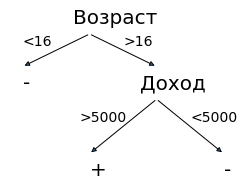

Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо "спуститься" по дереву до листа и выдать соответствующее значение. 

Подобные деревья решений широко используются в интеллектуальном анализе данных, например, в банках (кредитный скоринг), в рекомендательных системах торговых онлайн-площадок (подбор наиболее подходящего товара), маркетинговом анализе (оценка лояльности клиентов). Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.

При построении дерева принятия решений используется понятие энтропии ("меры беспорядка"). Энтропия характеризует меру беспорядка (хаоса)

Рассмотрим "игрушечный" пример.

In [54]:
from matplotlib.patches import ArrowStyle 

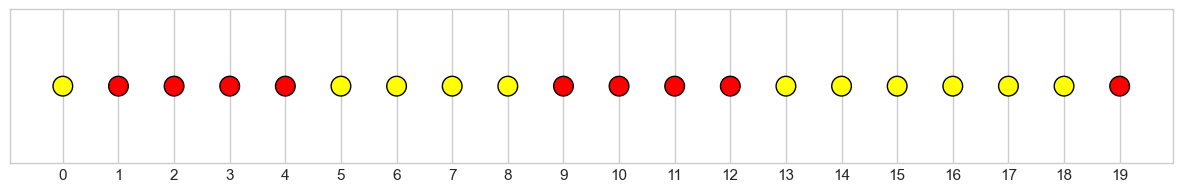

In [82]:
X = range(20)
colors = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
plt.figure(figsize=(15,2))
plt.xticks(X)
plt.yticks([])
plt.scatter(X, np.ones(len(X)), c=colors, s=200, cmap='autumn', edgecolors='black', linewidths=1)
plt.show()

Вероятности того, что мы вытянем синий шар и желтый шар вычисляются по формуле $P=\frac{m}{n}$, $m$ - количество благоприятных случаев, $n$ - общее количество случаев. Всего шаров 20, из них желтых - 11, а красных - 9.

In [56]:
print("Вероятность вытянуть желтый шар: {}, вероятность вытянуть красный шар: {}".format(11/20, 9/20))

Вероятность вытянуть желтый шар: 0.55, вероятность вытянуть красный шар: 0.45


Вычислим энтропию данной системы по формуле
$$
S = -\sum_{i=1}^{n}{p_i \log_2{p_i}},
$$
где $p_i$ - вероятность того, что система находится в $i$-м состоянии. В нашем случае
$$
S_0 = -\frac{11}{20} \log_2 \frac{11}{20}-\frac{9}{20}\log_2 \frac{9}{20} \approx 1
$$

In [57]:
S0 = -11/20*np.log2(11/20)-9/20*np.log2(9/20)
print("Энтропия системы: {}".format(S0))

Энтропия системы: 0.9927744539878083


Разделим выборку на две подвыборки по следующему правилу - в одну выборку поместим шары с порядковым номером меньшим или равным 12, в другую - все остальные.

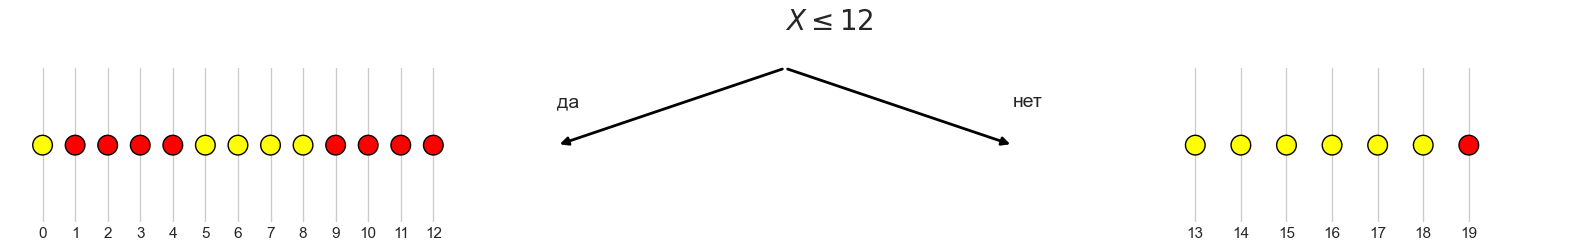

In [83]:
plt.figure(figsize=(20,2))

ax1 = plt.subplot(1,3,1, frameon=False, xticks=X[:13],  yticks=[], xlim=[-1,13], ylim=[0, 2])
ax2 = plt.subplot(1,3,2, frameon=False, xticks=[], yticks=[], xlim=[1,2], ylim=[0, 2])
ax3 = plt.subplot(1,3,3, frameon=False, xticks=X[13:],  yticks=[], xlim=[11,21], ylim=[0, 2])

ax1.scatter(X[:13], np.ones(len(X[:13])), c=colors[:13], s=200, cmap='autumn', edgecolors='black', linewidths=1)
ax2.text(1.5, 2.5, u'$ X \\leq 12$', size=20)
ax2.annotate ('', xy=(1.5, 2), xytext = (1,1), arrowprops = dict(arrowstyle='<|-', facecolor='black', linewidth=2, color='black'))
ax2.text(1, 1.5, "да", size=14)
ax2.annotate ('', xy=(1.5, 2), xytext = (2,1), arrowprops = dict(arrowstyle='<|-', facecolor='black', linewidth=2, color='black'))
ax2.text(2, 1.5, "нет", size=14)
ax3.scatter(X[13:], np.ones(len(X[13:])), c=colors[13:], s=200, cmap='autumn', edgecolors='black', linewidths=1)

plt.show()

Для левой и правой выборок отдельно посчитаем энтропию. В левой выборке 13 шаров (5 желтых и 8 красных), в правой выборке 7 шаров (6 желтых и 1 красный).
Энтропия левой выборки вычисляется по формуле
$$
S_1 = -\frac{5}{13} \log_2 \frac{5}{13} - \frac{8}{13}\log_2 \frac{8}{13},
$$
Энтропия правой выборки вычисляется по формуле
$$
S_2 = -\frac{6}{7} \log_2 \frac{6}{7} - \frac{1}{7}\log_2 \frac{1}{7},
$$

In [71]:
S1, S2 = -5/13*np.log2(5/13)-8/13*np.log2(8/13), -6/7*np.log2(6/7)-1/7*np.log2(1/7)
print("Энтропия левой выборки равна {}".format(S1))
print("Энтропия правой выборки равна {}".format(S2))

Энтропия левой выборки равна 0.9612366047228759
Энтропия правой выборки равна 0.5916727785823275


Видим, что при разбиении по признаку (меньше или больше 12) мы получили две меньшие выборки, каждая из которых имеет меньшую энтропию.

Кроме энтропии $S$, характеризующей увеличение беспорядка, используется величина "прирост информации" (IG, information gain), которая формально задается следующим соотношением

$$
IG(Q) = S_0 - \sum_{i=1}^{q}{\frac{N_i}{N}S_i},
$$
где $q$ - количество выборок, на которые разбивается исходная выборка с использованием правила $Q$.

Для разбиения $12\le x$ величина IG(Q) вычисляется следующим образом:

$$
IG(X\le 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2
\approx
0.99 - \frac{13}{20}\left( -\frac{5}{13} \log_2{\frac{5}{13}} -\frac{8}{13} \log_2{\frac{8}{13}}\right) - 
\frac{7}{20}\left( -\frac{6}{7} \log_2{\frac{6}{7}} -\frac{2}{7} \log_2{\frac{2}{7}}\right) 
\approx 0.16
$$

In [72]:
print("Прирост информации при разделении на выборки: {}".format(S0-13/20*S1-7/20*S2))

Прирост информации при разделении на выборки: 0.16088518841412436


При построении дерева принятия решений продолжают разбиение по аналогии, уменшая энтропию (увеличивая прирост информации). Продолжая в рассматриваемом примере процедуру получим следующее дерево принятия решений.

Кроме энтропии используются и другие метрики: неопределенность Джини $G = 1-\sum_{k}{(p_k)^2}$, Misclassification Error $J = 1-\sum_{k}{|p_k|}$.

## Наконец наш пример:)

In [49]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


[Text(0.4967948717948718, 0.9615384615384616, 'x1 <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]\nclass = red'),
 Text(0.26282051282051283, 0.8846153846153846, 'x2 <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]\nclass = red'),
 Text(0.11538461538461539, 0.8076923076923077, 'x1 <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]\nclass = red'),
 Text(0.08974358974358974, 0.7307692307692307, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]\nclass = red'),
 Text(0.14102564102564102, 0.7307692307692307, 'x2 <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]\nclass = red'),
 Text(0.11538461538461539, 0.6538461538461539, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]\nclass = red'),
 Text(0.16666666666666666, 0.6538461538461539, 'x2 <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]\nclass = red'),
 Text(0.14102564102564102, 0.5769230769230769, 'x2 <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]\nclass = red'),
 Text(0.11538461538461539, 

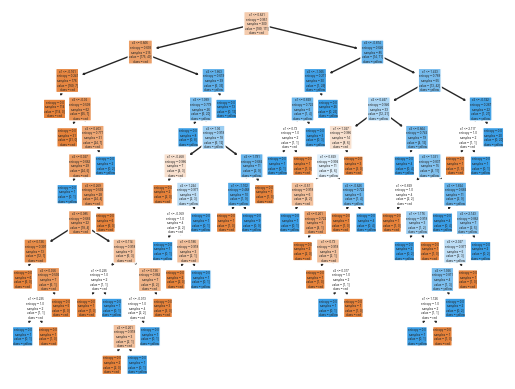

In [56]:
plot_tree(classifier, 
          filled=True, 
          feature_names=["x1","x2"], 
          class_names=['red', 'yellow'], 
          rounded=True) 

In [51]:
y_pred = classifier.predict(X_test)
# pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
labels_DT = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_DT

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


In [52]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

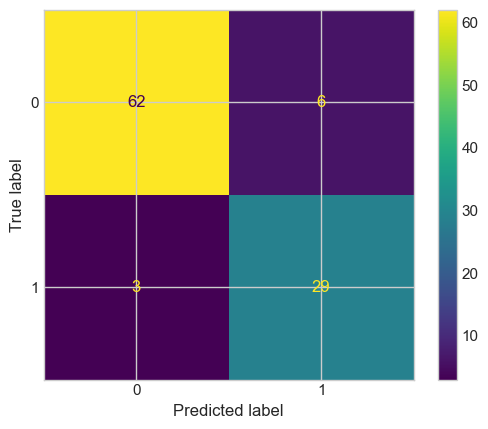

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

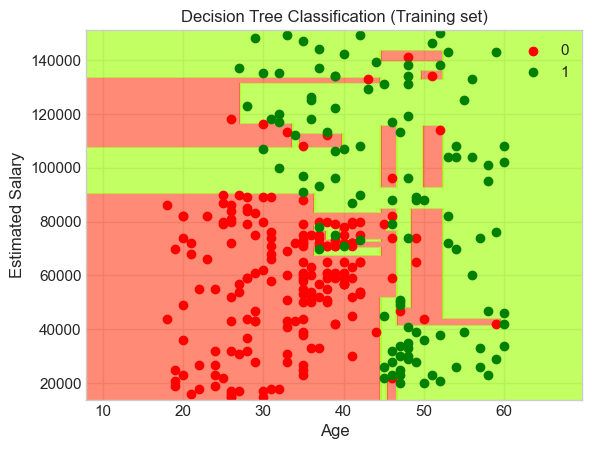

In [54]:
# Train set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

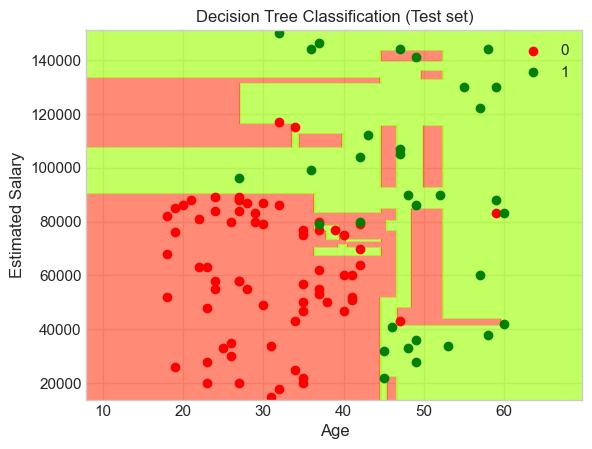

In [55]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Random Forest <a name='rf'></a>

In [57]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [58]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [59]:
y_pred = classifier.predict(X_test)
# pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
labels_RF = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                             y_test.reshape(len(y_test),1)),1), 
                             columns=['y_pred', 'y_test'])
labels_RF

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


In [60]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm)
accuracy_score(y_test, y_pred)

[[63  5]
 [ 4 28]]


0.91

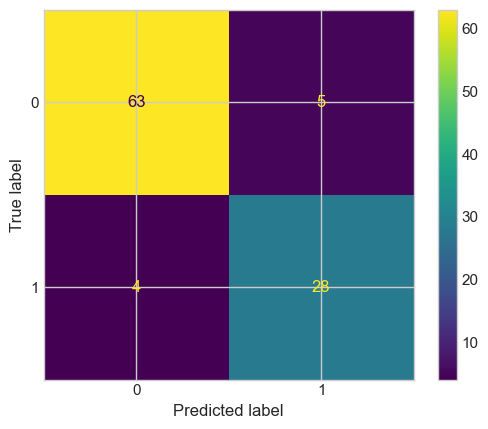

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

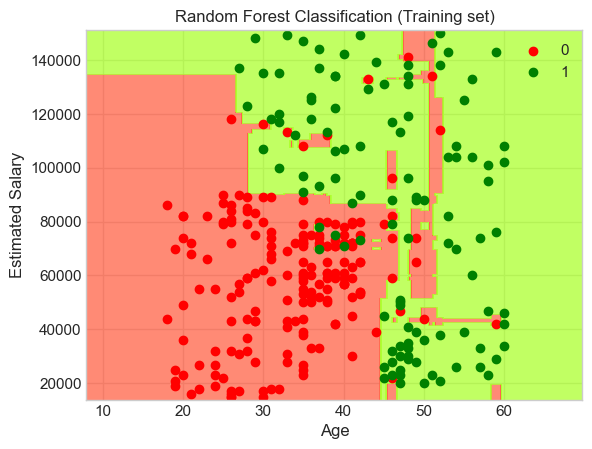

In [62]:
# Train test
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

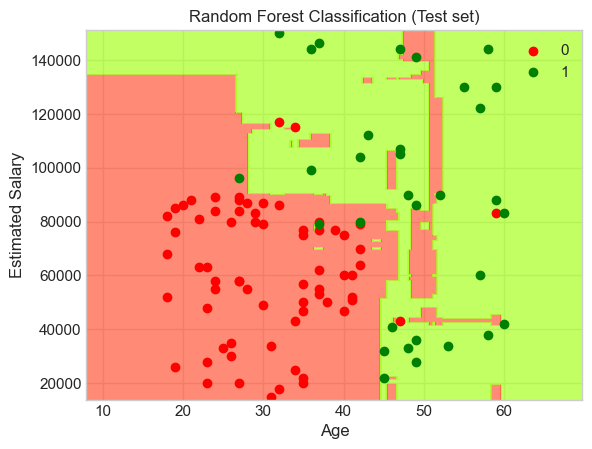

In [63]:
# Test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'greenyellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# ДЗ №1 <a name='dz1'></a>


[Набор](https://archive.ics.uci.edu/dataset/2/adult) данных UCI Adult (качать не надо, все есть в репозитории): классификация людей с помощью демографических данных для прогнозирования, зарабатывает ли человек более \$ 50 000 в год.

Описание признаков: 

**Age** – возраст, количественный признак  
**Workclass** – тип работодателя, количественный признак  
**fnlwgt** – итоговый вес обьекта, количественный признак    
**Education** – уровень образования, качественный признак  
**Education_Num** – количество лет обучения, количественный признак  
**Martial_Status** – семейное положение, категориальный признак  
**Occupation** – профессия, категориальный признак  
**Relationship** – тип семейных отношений, категориальный признак    
**Race** – раса, категориальный признак  
**Sex** – пол, качественный признак  
**Capital_Gain** – прирост капитала, количественный признак  
**Capital_Loss** – потери капитала, количественный признак  
**Hours_per_week** – количество часов работы в неделю, количественный признак  
**Country** – страна, категориальный признак  
   
Целевая переменная: **Target** – уровень заработка, категориальный (бинарный) признак 

1. Выполнить разведочный анализ данных, заполнить пропуски, преобразовать категориальные данные в числовые:
    - Кодируем категориальные признаки 'Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'. Это можно сделать с помощью метода pandas get_dummies.
    
2. В тестовой выборке не оказалось Голландии. Завести необходимый признак из нулей.

3. Обучить LogisticRegression(). Использовать в качестве baseline.
4. Обучить k-NN, SVC, Naive Bayes, DecisionTree, RandomForest
5. Обучить SVC с такими параметрами {'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
6. Обучить DecisionTreeClassifier c параметрами tree_params = {'max_depth': range(2,11)}
7. Обучить RandomForestClassifier c параметрами forest_params = {'max_depth': range(10, 21), 'max_features': range(5, 105, 10)}
8. Использовать кроссвалидацию и GridSearchCV.
9. Сравнить все модели с baseline
10. Вывести confusion matrix


In [2]:
data_train = pd.read_csv('../../data/adult_train.csv', sep=';')
data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data_test = pd.read_csv('../../data/adult_test.csv', sep=';')
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


<a href='#toc'>Назад к Оглавлению</a>

## ДЗ №2 <a name='dz2'></a>

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Вывести матрицу несоответствия

In [81]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

# plt.figure(figsize=(20,4))
# for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
#     plt.subplot(1, 5, index + 1)
#     plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
#     plt.title('Ответ: %i\n' % label, fontsize = 14)

In [84]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [88]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
X.shape, y.shape

((1797, 64), (1797,))

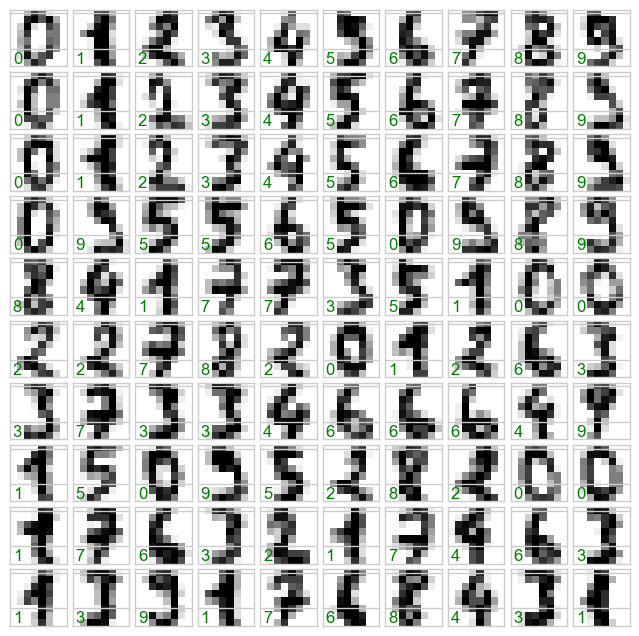

In [92]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticklabels':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
             interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

<a href='#toc'>Назад к Оглавлению</a>